# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid":api_key,
    "units":"imperial"
}

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

# initialize container list and counter values to keep track of loop set and record within set
city_weather_data = []
set_counter = 1
record_counter = 1

for city in cities:
    params["q"] = city
    response = requests.get(base_url, params=params)

    # Skip iteration if city not found
    if response.ok == False:
        print("City not found. Skipping...")
        continue
    else:    
        response_json = response.json()
        response_dict = {
            "City":response_json["name"],
            "Cloudiness":response_json["clouds"]["all"],
            "Country":response_json["sys"]["country"],
            "Date":response_json["dt"],
            "Humidity":response_json["main"]["humidity"],
            "Latitude":response_json["coord"]["lat"],
            "Longitude":response_json["coord"]["lon"],
            "Max Temp":response_json["main"]["temp_max"],
            "Wind Speed":response_json["wind"]["speed"]
        }
        city_weather_data.append(response_dict)
        print(f"Processing Record {record_counter} of Set {set_counter} | {response_dict['City']}")
        record_counter += 1

        # Once record records reached, wait 1 minute and reset counters due to API limit
        if record_counter % 50 == 0:
            print("Waiting 1 minute due to API call limitations!!!")
            time.sleep(60)
            record_counter = 1
            set_counter += 1

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | Washington DC.
Processing Record 2 of Set 1 | Mataura
Processing Record 3 of Set 1 | Sarh
City not found. Skipping...
Processing Record 4 of Set 1 | Sao Filipe
Processing Record 5 of Set 1 | Jiayuguan
Processing Record 6 of Set 1 | Ushuaia
Processing Record 7 of Set 1 | Tigil
Processing Record 8 of Set 1 | Tuktoyaktuk
Processing Record 9 of Set 1 | Upernavik
Processing Record 10 of Set 1 | Albany
Processing Record 11 of Set 1 | Bethel
Processing Record 12 of Set 1 | Lebu
Processing Record 13 of Set 1 | Key Largo
Processing Record 14 of Set 1 | Longyearbyen
Processing Record 15 of Set 1 | Luderitz
Processing Record 16 of Set 1 | Port Alfred
Processing Record 17 of Set 1 | New Norfolk
Processing Record 18 of Set 1 | Vaini
Processing Record 19 of Set 1 | Atuona
City not found. Skipping...
Processing Record 20 of Set 1 | Gigmoto
Processing Record 21 of Set 1 | Barrow
Processing Record 22 of Set 1 | Rio G

Processing Record 36 of Set 4 | College
Processing Record 37 of Set 4 | Thompson
Processing Record 38 of Set 4 | Skjervoy
Processing Record 39 of Set 4 | Omboue
Processing Record 40 of Set 4 | San Quintin
Processing Record 41 of Set 4 | Benjamin Hill
Processing Record 42 of Set 4 | Dehloran
Processing Record 43 of Set 4 | Bakchar
City not found. Skipping...
City not found. Skipping...
Processing Record 44 of Set 4 | Outjo
Processing Record 45 of Set 4 | Victoria
City not found. Skipping...
Processing Record 46 of Set 4 | Mar del Plata
City not found. Skipping...
Processing Record 47 of Set 4 | Ilulissat
Processing Record 48 of Set 4 | Funtua
Processing Record 49 of Set 4 | Mabaruma
Waiting 1 minute due to API call limitations!!!
Processing Record 1 of Set 5 | Alihe
Processing Record 2 of Set 5 | Mahon
Processing Record 3 of Set 5 | Srednekolymsk
Processing Record 4 of Set 5 | Chipinge
Processing Record 5 of Set 5 | Andros Town
Processing Record 6 of Set 5 | Tiznit
City not found. Skipp

Processing Record 17 of Set 8 | Aquiraz
Processing Record 18 of Set 8 | Saldanha
Processing Record 19 of Set 8 | Pathein
Processing Record 20 of Set 8 | Salinopolis
Processing Record 21 of Set 8 | Abha
Processing Record 22 of Set 8 | San Luis de Palenque
Processing Record 23 of Set 8 | Muli
Processing Record 24 of Set 8 | Natchez
Processing Record 25 of Set 8 | Bilibino
Processing Record 26 of Set 8 | Tezu
Processing Record 27 of Set 8 | Murzzuschlag
City not found. Skipping...
Processing Record 28 of Set 8 | Luganville
Processing Record 29 of Set 8 | Santo Antonio do Ica
Processing Record 30 of Set 8 | Iguai
Processing Record 31 of Set 8 | Ucluelet
City not found. Skipping...
City not found. Skipping...
Processing Record 32 of Set 8 | Beloha
Processing Record 33 of Set 8 | Nileshwar
Processing Record 34 of Set 8 | Danilov
Processing Record 35 of Set 8 | Seymchan
Processing Record 36 of Set 8 | Bar Harbor
Processing Record 37 of Set 8 | Hobyo
Processing Record 38 of Set 8 | Oktyabrskiy

City not found. Skipping...
Processing Record 1 of Set 12 | Maragogi
Processing Record 2 of Set 12 | Osmena
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# save API output as CSV to load in next time
import csv
with open("output_data/cities.csv", 'w') as outfile:
    wr = csv.writer(outfile)
    wr.writerow(city_weather_data)

In [6]:
# # uncomment to read in API output CSV as list of dictionaries
# # load this in instead of running data retrieval process again
# import csv
# import ast

# with open('output_data/cities.csv', 'r') as infile:
#     reader = csv.reader(infile,delimiter=',', quotechar='"')
#     new_list = list(reader)

# city_weather_data = [ast.literal_eval(i) for i in new_list[0]]
# city_weather_df = pd.DataFrame(city_weather_data)

In [8]:
# convert list of data to DataFrame
# add converted date in for readability
city_weather_df = pd.DataFrame(city_weather_data)
city_weather_df["Converted Date"] = pd.to_datetime(city_weather_df["Date"],unit='s').dt.date
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed,Converted Date
0,Washington DC.,75,US,1567365578,61,38.90,-77.04,82.99,3.36,2019-09-01
1,Mataura,14,NZ,1567365639,84,-46.19,168.86,43.00,1.99,2019-09-01
2,Sarh,20,TD,1567365640,83,9.14,18.39,80.60,2.51,2019-09-01
3,Sao Filipe,100,CV,1567365640,82,14.90,-24.50,80.15,6.93,2019-09-01
4,Jiayuguan,99,CN,1567365640,25,39.77,98.29,69.89,9.55,2019-09-01


Alright, we have our dataset set up! Let's do a quick sanity check to see if anything is missing.

In [9]:
city_weather_df.count()

City              541
Cloudiness        541
Country           541
Date              541
Humidity          541
Latitude          541
Longitude         541
Max Temp          541
Wind Speed        541
Converted Date    541
dtype: int64

In [10]:
city_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 10 columns):
City              541 non-null object
Cloudiness        541 non-null int64
Country           541 non-null object
Date              541 non-null int64
Humidity          541 non-null int64
Latitude          541 non-null float64
Longitude         541 non-null float64
Max Temp          541 non-null float64
Wind Speed        541 non-null float64
Converted Date    541 non-null object
dtypes: float64(4), int64(3), object(3)
memory usage: 42.3+ KB


Nope, all is good. Time to plot!

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

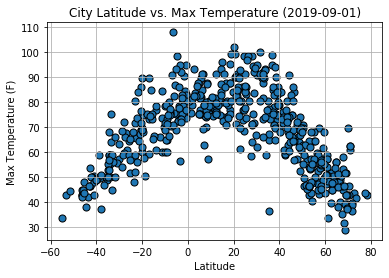

In [11]:
date = city_weather_df["Converted Date"][0]

ax = city_weather_df.plot(kind="scatter", x="Latitude", y="Max Temp", edgecolor='k', facecolor='b', s=50)
ax.set_title(f"City Latitude vs. Max Temperature ({date})");
ax.set_xlabel("Latitude");
ax.set_ylabel("Max Temperature (F)");
ax.grid();

Latitude is parallel to the equator where a value of zero defines the actual equator and the north/south pole have the values +90/-90 degress respectively. As we can see, cities closer to the equator tend to have higher max temperatures at this time of year than those closer to the poles and there is a very smooth pattern going from pole to equator to opposite pole.

#### Latitude vs. Humidity Plot

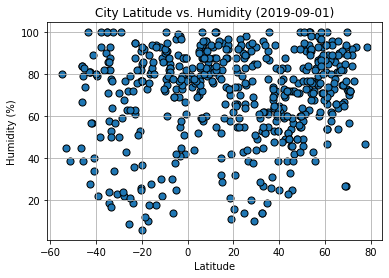

In [12]:
date = city_weather_df["Converted Date"][0]

ax = city_weather_df.plot(kind="scatter", x="Latitude", y="Humidity", edgecolor='k', facecolor='b', s=50)
ax.set_title(f"City Latitude vs. Humidity ({date})");
ax.set_xlabel("Latitude");
ax.set_ylabel("Humidity (%)");
ax.grid();

There is a large cluster of cities in this dataset where humidity is higher than 60%. At this time of year, it seems that the nothern hemisphere (i.e. latitude > 0) contains that cluster. This is probably due to it being the summer months in the northern hemisphere and so we have more humidity at this time.

#### Latitude vs. Cloudiness Plot

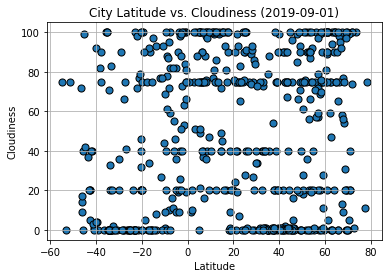

In [13]:
date = city_weather_df["Converted Date"][0]

ax = city_weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness", edgecolor='k', facecolor='b', s=50);
ax.set_title(f"City Latitude vs. Cloudiness ({date})");
ax.set_xlabel("Latitude");
ax.set_ylabel("Cloudiness");
ax.grid();

There really seems to be no relationship between latitude and cloudiness according to this plot. It ranges all over the place regardless of where each city is in the world. Therefore, latitude does not seem to have much of an effect on cloudiness.

#### Latitude vs. Wind Speed Plot

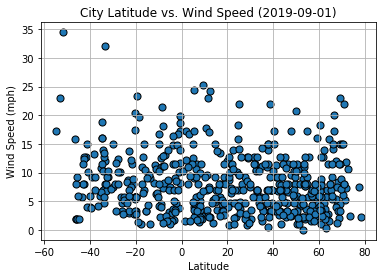

In [14]:
date = city_weather_df["Converted Date"][0]

ax = city_weather_df.plot(kind="scatter", x="Latitude", y="Wind Speed", edgecolor='k', facecolor='b', s=50);
ax.set_title(f"City Latitude vs. Wind Speed ({date})");
ax.set_xlabel("Latitude");
ax.set_ylabel("Wind Speed (mph)");
ax.grid();

Most cities have a wind speed of below 15 mph. Latitude again does not seem to be much of a factor as the wind speed is distributed pretty evenly across all latitudes. There are a few outliers closer to the poles though. Could be exceptions or it might indicate that wind speeds are more extreme at the poles.

## Conclusions based off the data

Summarized from above:
* (*Latitude vs Temperature*) Latitude is parallel to the equator where a value of zero defines the actual equator and the north/south pole have the values +90/-90 degress respectively. As we can see, cities closer to the equator tend to have higher max temperatures at this time of year than those closer to the poles and there is a very smooth pattern going from pole to equator to opposite pole.
    * Due to the nature of the Earth's rotation, summer time in the northern hemisphere is winter time in the southern hemisphere and vice versa (winter time in the northern hemisphere is summer time in the southern hemisphere). So even though I created this plot in September 2019, it would still look about the same even if I plotted it at **any time** of the year. In the opposite season, the plot would just be a mirror of itself. However, the plot is an upside quadratic equation (i.e. upside down "U") and the mirror image of that is...itself haha
* (*Latitude vs. Humidity*) There is a large cluster of cities in this dataset where humidity is higher than 60%. At this time of year, it seems that the nothern hemisphere (i.e. latitude > 0) contains that cluster. This is probably due to it being the summer months in the northern hemisphere and so we have more humidity at this time.
* (*Latitude vs Cloudiness*) There really seems to be no relationship between latitude and cloudiness according to this plot. It ranges all over the place regardless of where each city is in the world. Therefore, latitude does not seem to have much of an effect on cloudiness.
* (*Latitude vs. Wind Speed*) Most cities have a wind speed of below 15 mph. Latitude again does not seem to be much of a factor as the wind speed is distributed pretty evenly across all latitudes. There are a few outliers closer to the poles though. Could be exceptions or it might indicate that wind speeds are more extreme at the poles.